# Project for IE6200 (2021 Spring)

### Name: Priya Raul

## Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history.On April 15, 1912, during her  maiden  voyage,  the  widely  considered  “unsinkable”  RMS  Titanic  sank  after  colliding  with  an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.For thisproject youwere asked to answerthe following questions based on Titanic.CSV fileto find the possible groups of people were more likely to survive.

## Part 1: Data Manipulation

In order to analyzeand report on the data, youhave to use ipython notebook, along with the numpy, pandas, matplotlib.pyplot and seaborn python modules. Before you analyze on your data set, you need to preprocessyour original dataas the following questions.

In [2]:
import numpy as np
import pandas as pd

In [3]:
titanic_df=pd.read_csv(r"C:\Priya\MS\IE6200\Presentation\Titanic.csv")

### Q 1.1 What is the size of the dataset?

In [4]:
print("Size of dataset:",titanic_df.shape)

Size of dataset: (891, 12)


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q 1.2 What are the features in this dataset? What is the data type of the features in the dataset?

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q 1.3 Are there any duplicated rows or columns? You can delete that row if there are duplicated rows and columns.

In [7]:
duplicate=titanic_df[titanic_df.duplicated()]
print("Duplicate Rows and column:",duplicate.shape)

Duplicate Rows and column: (0, 12)


In [8]:
print("Shape of dataset with duplicates:",titanic_df.shape)
print("Shape of dataset without duplicates:",titanic_df.drop_duplicates().shape)

Shape of dataset with duplicates: (891, 12)
Shape of dataset without duplicates: (891, 12)


### Q 1.4 Is there any missing value in the dataset? You can delete that row if there aremissing values.

In [9]:
print ("null values: \n",titanic_df.isna().sum())
print ("Total null values in dataset: ",titanic_df.isna().sum().sum())

null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total null values in dataset:  866


In [10]:
newTitanic_df=titanic_df.dropna(how='any')
print("New dataframe without missing value:",newTitanic_df.shape)
print("Old dataframe with missing value:",titanic_df.shape)

New dataframe without missing value: (183, 12)
Old dataframe with missing value: (891, 12)


In [11]:
print ("null values: \n",newTitanic_df.isna().sum())

null values: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


We have manipulated our original data titanic_df to newTitanic_df
We will use manipulated data for analysis

### Part 2: Analysis 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [13]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Q 2.1 How old were Survivors compared to Non-Survivors? Did age effect chances of survival?

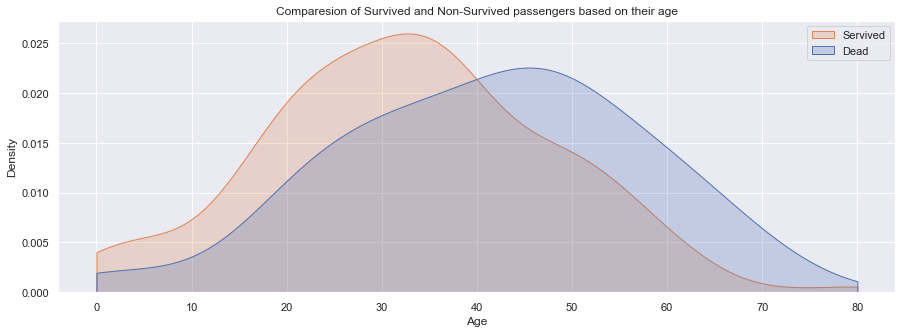

In [14]:
plt.figure(figsize=(15,5))
plt.title("Comparesion of Survived and Non-Survived passengers based on their age")
sns.kdeplot(newTitanic_df.Age[newTitanic_df.Survived==1], 
            label='Survived', shade=True,
            clip=(0, newTitanic_df['Age'].max()), 
            hue=newTitanic_df.Survived,color='blue')
sns.kdeplot(newTitanic_df.Age[newTitanic_df.Survived==0], 
            label='Dead', shade=True,
            clip=(0, newTitanic_df['Age'].max()),
            hue=newTitanic_df.Survived,color='red')
plt.legend(labels=['Servived', 'Dead'])
plt.xlabel('Age');

By seeing above result we can say that age effect chances of survival as 
the servival rate of age group 25-35 years is more.
and death rate of agegroup 40-50 is more.

### Q 2.2 Was the fare the same for men and women?

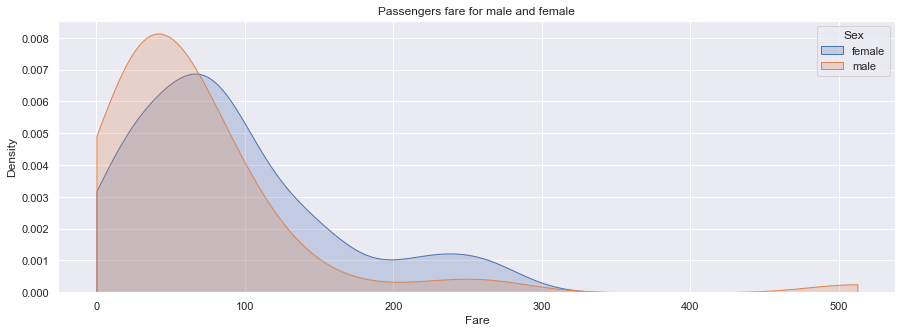

In [15]:
plt.figure(figsize=(15,5))
plt.title("Passengers fare for male and female")
sns.kdeplot(newTitanic_df.Fare[newTitanic_df.Sex=='female'], 
            label='female', shade=True,
            clip=(newTitanic_df['Fare'].min(),
                  newTitanic_df['Fare'].max()),
            hue=newTitanic_df.Sex)
sns.kdeplot(newTitanic_df.Fare[newTitanic_df.Sex=='male'],
            label='male', shade=True,
            clip=(newTitanic_df['Fare'].min(),
                  newTitanic_df['Fare'].max()),
            hue=newTitanic_df.Sex)
plt.xlabel('Fare');

Text(0, 0.5, 'Fare')

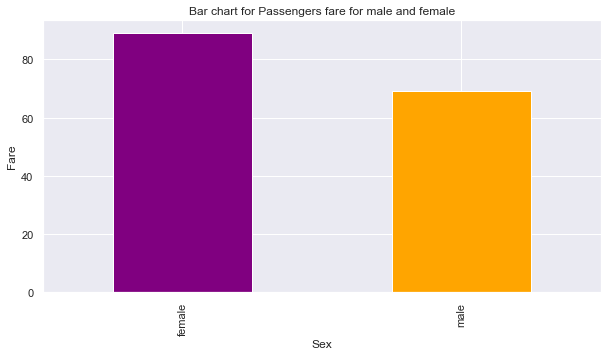

In [16]:
plt.figure(figsize=(10,5))
fareBySex = newTitanic_df.groupby('Sex')['Fare'].mean()
ax = fareBySex.plot.bar(color = ('Purple','Orange'))
ax.set_title("Bar chart for Passengers fare for male and female")
ax.set_ylabel('Fare')

By seeing above result the fare for male and femal was not same.
Fare for female passangers were higher than male passangers

### Q 2.3 How many females’ survivors compared to male’s survivors? Did the gender effect chances of survival?

[Text(0, 0, 'Survived'), Text(1, 0, 'Dead')]

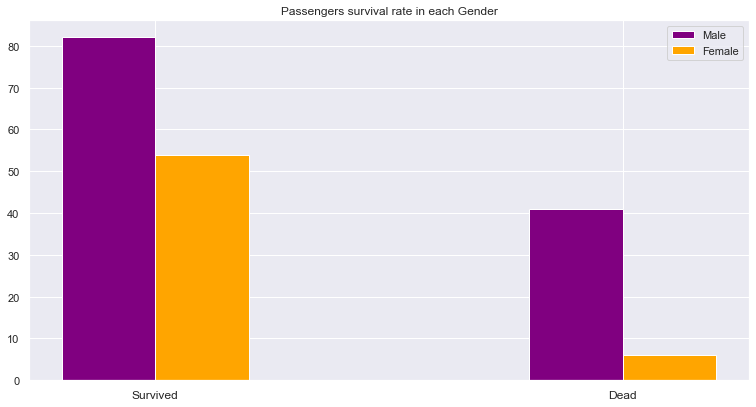

In [17]:
labels=['Survived','Dead']
X = np.arange(len(labels))
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
barwidth=0.20
ax.set_title("Passengers survival rate in each Gender")
ax.bar(X-barwidth/2,
       newTitanic_df[newTitanic_df.Survived==1]['Sex'].value_counts(),
       barwidth,label='Survived',color = 'Purple')
ax.bar(X +barwidth/2,
       newTitanic_df[newTitanic_df.Survived==0]['Sex'].value_counts(),
       barwidth, label='Dead',color = 'Orange')
ax.legend(labels=['Male','Female'])
ax.set_xticks(X)
ax.set_xticklabels(labels,fontsize=12)

By seeing above graph we can say that count of male passangers were more that female passangers.
for male passagngers the count of servival is more than female but comparativly the death count is also high.
for female passanger the death count is less than the servival count
Means females had a greater rate of survival than males.

### Q 2.4 How many passengers where in each class? How many passengers survived in each class? Did Pclass affect survival?

[Text(0, 0, 'Class 3'), Text(1, 0, 'Class 2'), Text(2, 0, 'Class 1')]

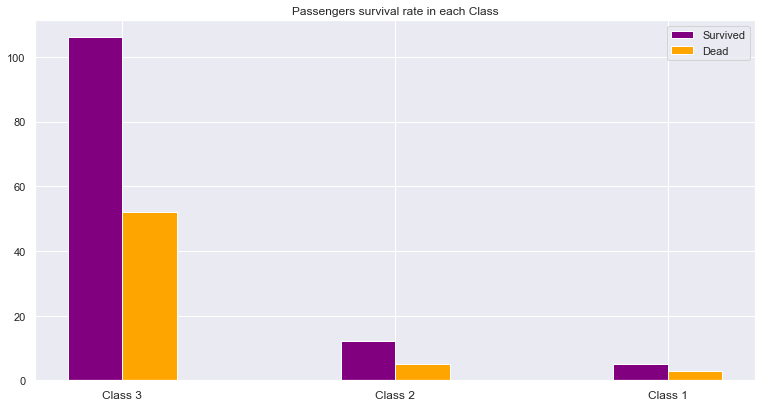

In [18]:
labels=['Class 3','Class 2','Class 1']
X = np.arange(len(labels))
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
barwidth=0.20
ax.set_title("Passengers survival rate in each Class")
ax.bar(X-barwidth/2, 
       newTitanic_df[newTitanic_df.Survived==1]['Pclass'].value_counts(),
       barwidth, label='Survived', color = 'Purple')
ax.bar(X+barwidth/2, 
       newTitanic_df[newTitanic_df.Survived==0]['Pclass'].value_counts(),
       barwidth, label='Dead', color = 'Orange')
ax.legend(labels=['Survived', 'Dead'])
ax.set_xticks(X)
ax.set_xticklabels(labels,fontsize=12)

Above result shows that the class 3 had more passengers, than all classes, and more survived passangers than the class 2 passangers, 
The class 3 had the lowest survival rate as the rate of death is more compare to the onboard passangers in class 3.
The class 1 passengers had the highest survival rate as the rate of death is less compare to the onboard passangers in class 1.